1. Visualicen los datos para ver si pueden detectar algunos grupos. **Ayuda:**   utilicen la forma del sépalo:

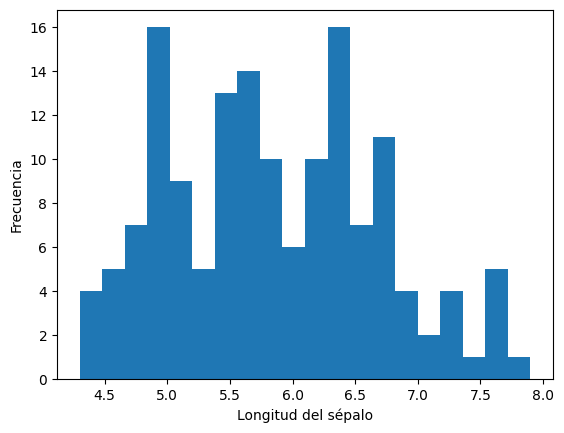

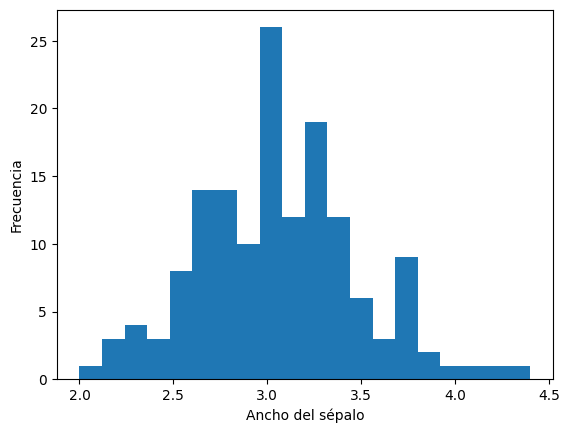

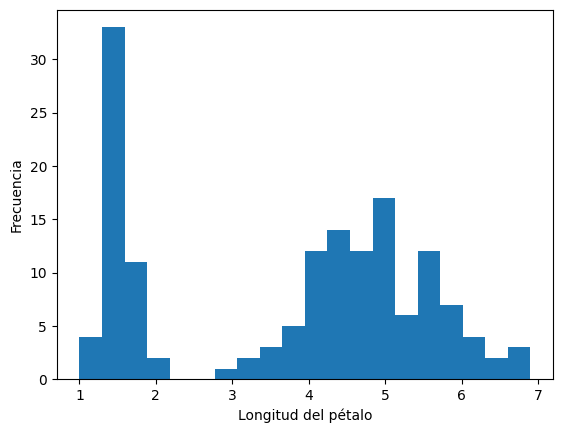

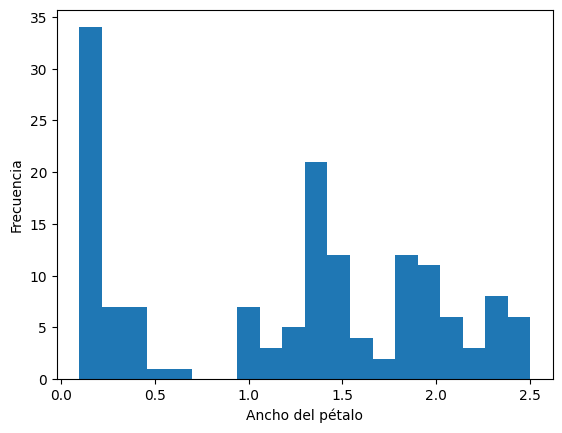

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

iris_data = pd.read_csv("iris.csv")

plt.hist(iris_data["sepal_length"], bins=20)
plt.xlabel("Longitud del sépalo")
plt.ylabel("Frecuencia")
plt.show()

plt.hist(iris_data["sepal_width"], bins=20)
plt.xlabel("Ancho del sépalo")
plt.ylabel("Frecuencia")
plt.show()

plt.hist(iris_data["petal_length"], bins=20)
plt.xlabel("Longitud del pétalo")
plt.ylabel("Frecuencia")
plt.show()

plt.hist(iris_data["petal_width"], bins=20)
plt.xlabel("Ancho del pétalo")
plt.ylabel("Frecuencia")
plt.show()



2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.  

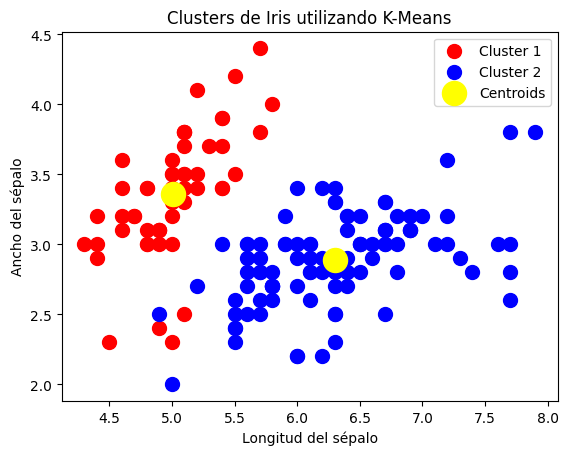

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

iris_data = pd.read_csv("iris.csv")
X = iris_data.iloc[:, [0, 1, 2, 3]].values

#K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de Iris')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.legend()
plt.show()

3. Estandaricen los datos e intenten el paso 2, de nuevo.  ¿Qué diferencias hay, si es que lo hay?

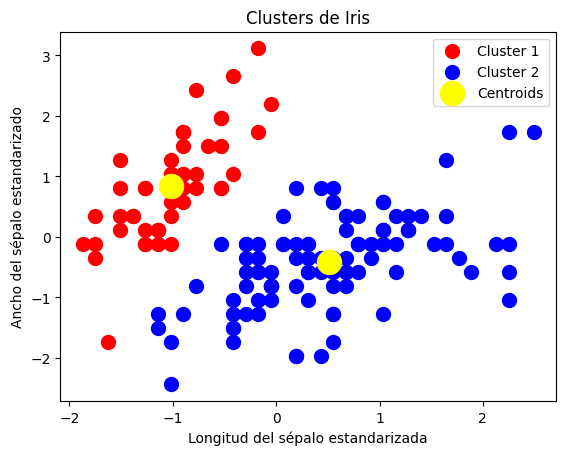

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris_data = pd.read_csv("iris.csv")
X = iris_data.iloc[:, [0, 1, 2, 3]].values

# estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_std)

plt.scatter(X_std[y_kmeans == 0, 0], X_std[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_std[y_kmeans == 1, 0], X_std[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters de Iris')
plt.xlabel('Longitud del sépalo estandarizada')
plt.ylabel('Ancho del sépalo estandarizado')
plt.legend()
plt.show()


La principal diferencia son los valores de los centroides y la escala de los ejes x e y. Los centroides ahora están en una escala estandarizada y los ejes también están en una escala estandarizada. Los patrones de agrupación en los datos estan iguales.

4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10)



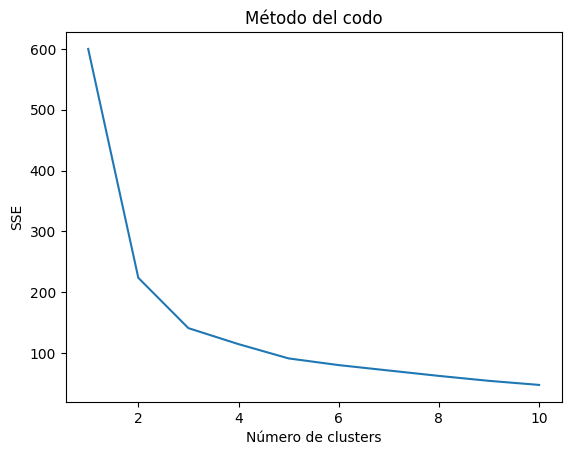

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

iris_data = pd.read_csv("iris.csv")
X = iris_data.iloc[:, [0, 1, 2, 3]].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# calcular el valor de SSE para diferentes valores de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()


El mejor numero de cluesters seria de 2 a 5 donde la grafica se inclina

5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.


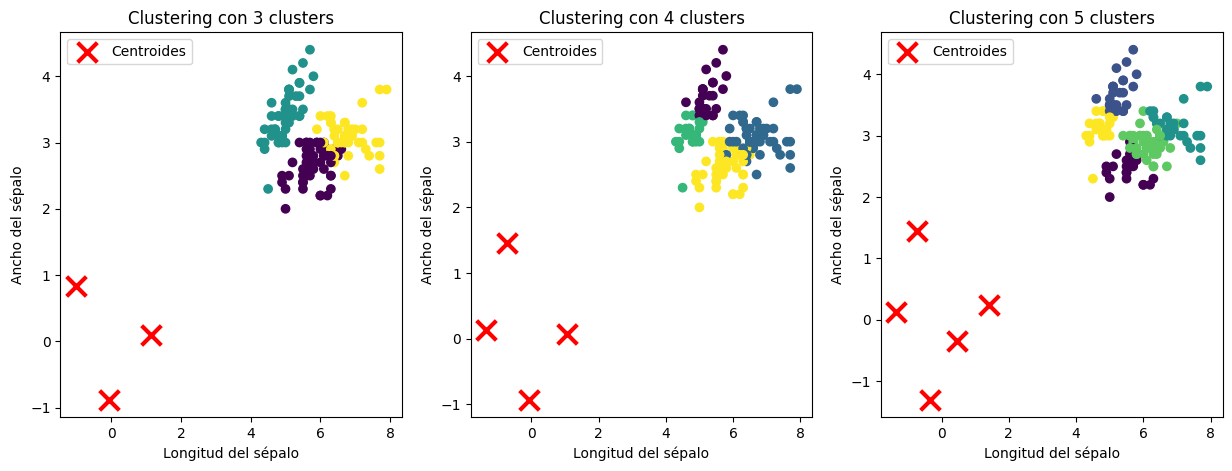

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


iris_data = pd.read_csv("iris.csv")
X = iris_data.iloc[:, [0, 1, 2, 3]].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# realizar el clustering con diferentes valores de k
kmeans_3 = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_5 = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# ajustar el modelo a los datos estandarizados
y_kmeans_3 = kmeans_3.fit_predict(X_std)
y_kmeans_4 = kmeans_4.fit_predict(X_std)
y_kmeans_5 = kmeans_5.fit_predict(X_std)

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_3, cmap='viridis')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroides')
plt.title('Clustering con 3 clusters')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.legend()

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_4, cmap='viridis')
plt.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroides')
plt.title('Clustering con 4 clusters')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.legend()

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_5, cmap='viridis')
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroides')
plt.title('Clustering con 5 clusters')
plt.xlabel('Longitud del sépalo')
plt.ylabel('Ancho del sépalo')
plt.legend()

plt.show()


6. Comparen sus soluciones con los datos reales, archivo: *iris-con-respuestas.csv*


In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

iris_data = pd.read_csv("iris.csv")
X = iris_data.iloc[:, [0, 1, 2, 3]].values
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# realizar el clustering con el valor de k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_pred = kmeans.fit_predict(X_std)

iris_data_with_labels = pd.read_csv("iris-con-respuestas.csv")
y_true = iris_data_with_labels.iloc[:, 4].values

# calcular el índice de Rand ajustado (ARI) para comparar la solución de clustering con las etiquetas reales
ari = adjusted_rand_score(y_true, y_pred)
print("Índice de Rand ajustado (ARI):", ari)


Índice de Rand ajustado (ARI): 0.6201351808870379
